In [1]:
import numpy as np
import pickle
import torch
import torchvision
import matplotlib.patches as mpatches
import json

import pylab as plt
plt.rc('text', usetex=True)
plt.rc('font', size=30,family='serif')
# plt.style.use('matplotlibrc')
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline


In [2]:
linclass_folders = ['BP/', 'FA/', 'PAL/']
model_labels = ['BP', 'FA', 'PAL']

In [3]:
# determine learning rates with highest linear classification accuracy

winning_lrs = []

for model, folder in zip(model_labels, linclass_folders):
    with open(folder + '/lin_acc_lr_seeds_epochs.npy', 'rb') as input:
        lin_acc_lr_seeds_epochs = np.load(input)
        mean_arr = np.mean(lin_acc_lr_seeds_epochs[:,:,-1], axis=1)
        print("model: " + model + " lr" + str(mean_arr.argmax()), mean_arr.max())
        winning_lrs.append(mean_arr.argmax())

model: BP lr15 0.3973758012820513
model: FA lr0 0.2121494391025641
model: PAL lr6 0.3464543269230769


# Plot lin acc of best lr for all models

In [4]:
lin_acc_seeds_epochs_per_model = []
for linclass_folder, winning_lr in zip(linclass_folders, winning_lrs):
     lin_acc_seeds_epochs_per_model.append(np.load(linclass_folder + 'lin_acc_lr_seeds_epochs.npy')[winning_lr])

BP 0.3973758012820513 0.016172530190882443
FA 0.2121494391025641 0.010895663156060557
PAL 0.3464543269230769 0.016462044305964856


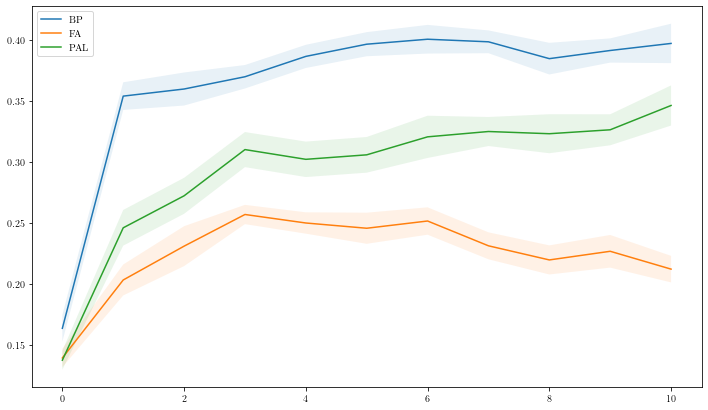

In [5]:
ax = plt.figure(figsize=(12,7))

for model_label, lin_acc_seeds_epochs in zip(model_labels, lin_acc_seeds_epochs_per_model):
    mean = np.mean(lin_acc_seeds_epochs,axis=0)
    std = np.std(lin_acc_seeds_epochs,axis=0) / np.sqrt(len(lin_acc_seeds_epochs)) # divide by number of runs because this is mean of means (seeds over test set)
    plt.plot(np.arange(len(mean)),mean, label=model_label)
    plt.fill_between(np.arange(len(mean)), mean+std, mean-std, alpha=.1)
    
    print(model_label, mean[-1], std[-1])

plt.legend()

plt.show()

# Angle between B and W.T for best lr with PAL

In [16]:
PATH = 'PAL/runs/lr6/'

for 
with open(PATH_OUTPUT + "weights.pkl", "wb") as output:
    pickle.load(weights_time_series, output)

BP             PAL            linclass.ipynb
FA             PAL_no_tauLO   runner.py
